In [1]:
from lsst.sims.maf.db import OpsimDatabase
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

In [2]:
opsdb = OpsimDatabase('/Users/lynnej/opsim/db/enigma_1189_sqlite.db')
opsimName = 'enigma_1189'
opsdb = OpsimDatabase('/Users/lynnej/opsim/db/minion_1016_sqlite.db')
opsimName = 'minion_1016'

In [3]:
m = metrics.CountMetric(col='expMJD', metricName='NVisits')
s = slicers.OpsimFieldSlicer()
constraint = '(filter="g") or (filter="r") or (filter="i")'
bundle = mb.MetricBundle(metric=m, slicer=s, constraint=constraint,
                        runName=opsimName, metadata='g, r and i filters')

In [4]:
bg = mb.MetricBundleGroup({'nvisits':bundle}, dbObj=opsdb, outDir='.', resultsDb=None)
bg.runAll()

Querying database with constraint (filter="g") or (filter="r") or (filter="i")
Found 1327068 visits
Running:  ['nvisits']


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:91: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:592: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


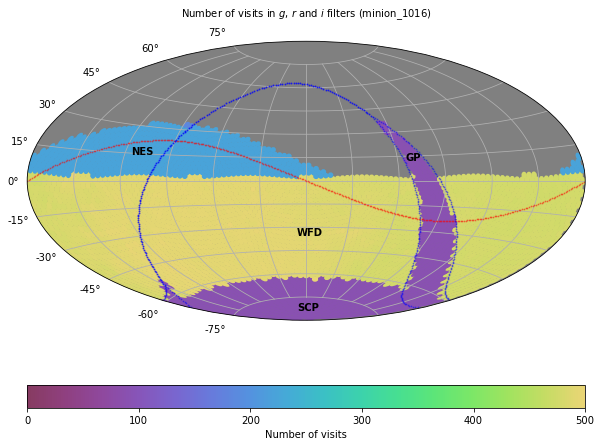

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plotDict = {'colorMin': 0, 'colorMax': 500, 
            'title':r'Number of visits in $g$, $r$ and $i$ filters (%s)' % (opsimName),
            'xlabel':r'Number of visits',
            'figsize': (10, 8)}
bundle.setPlotDict(plotDict)
bundle.plot(plotFunc=plots.BaseSkyMap())
plt.figure(1)
plt.figtext(.5, .5, 'WFD', fontweight='demibold')
plt.figtext(.27, .64, 'NES', fontweight='demibold')
plt.figtext(0.65, 0.63, 'GP', fontweight='demibold')
plt.figtext(.5, .37, 'SCP', fontweight='demibold')
plt.savefig('Nvisits_gri.pdf')